In [25]:
##### install packages
install.packages('ggplot2')
install.packages('dplyr')
install.packages('ggthemes')
library(ggplot2)
library(dplyr)
library(ggthemes)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Warning message in install.packages("dplyr"):
“installation of package ‘dplyr’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [5]:
##### Load the titanic dataset
Titanic_train <- read.csv('/Users/Xuhuiz2/Desktop/train.csv')
Titanic_test <- read.csv('/Users/Xuhuiz2/Desktop/test.csv')
head(Titanic_train)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


In [6]:
##### Initial EDA
glimpse(Titanic_train)

Observations: 891
Variables: 12
$ PassengerId <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, ...
$ Survived    <int> 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0...
$ Pclass      <int> 3, 1, 3, 1, 3, 3, 1, 3, 3, 2, 3, 1, 3, 3, 3, 2, 3, 2, 3...
$ Name        <fctr> Braund, Mr. Owen Harris, Cumings, Mrs. John Bradley (F...
$ Sex         <fctr> male, female, female, female, male, male, male, male, ...
$ Age         <dbl> 22, 38, 26, 35, 35, NA, 54, 2, 27, 14, 4, 58, 20, 39, 1...
$ SibSp       <int> 1, 1, 0, 1, 0, 0, 0, 3, 0, 1, 1, 0, 0, 1, 0, 0, 4, 0, 1...
$ Parch       <int> 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 5, 0, 0, 1, 0, 0...
$ Ticket      <fctr> A/5 21171, PC 17599, STON/O2. 3101282, 113803, 373450,...
$ Fare        <dbl> 7.2500, 71.2833, 7.9250, 53.1000, 8.0500, 8.4583, 51.86...
$ Cabin       <fctr> , C85, , C123, , , E46, , , , G6, C103, , , , , , , , ...
$ Embarked    <fctr> S, C, S, S, S, Q, S, S, S, C, S, S, S, S, S, S, Q, S, ...


In [7]:
### Transform Pclass to levels
Titanic_train$Pclass <- as.factor(Titanic_train$Pclass)
levels(Titanic_train$Pclass) <- c('Upper', 'Middle', 'Lower')
glimpse(Titanic_train)

Observations: 891
Variables: 12
$ PassengerId <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, ...
$ Survived    <int> 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0...
$ Pclass      <fctr> Lower, Upper, Lower, Upper, Lower, Lower, Upper, Lower...
$ Name        <fctr> Braund, Mr. Owen Harris, Cumings, Mrs. John Bradley (F...
$ Sex         <fctr> male, female, female, female, male, male, male, male, ...
$ Age         <dbl> 22, 38, 26, 35, 35, NA, 54, 2, 27, 14, 4, 58, 20, 39, 1...
$ SibSp       <int> 1, 1, 0, 1, 0, 0, 0, 3, 0, 1, 1, 0, 0, 1, 0, 0, 4, 0, 1...
$ Parch       <int> 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 5, 0, 0, 1, 0, 0...
$ Ticket      <fctr> A/5 21171, PC 17599, STON/O2. 3101282, 113803, 373450,...
$ Fare        <dbl> 7.2500, 71.2833, 7.9250, 53.1000, 8.0500, 8.4583, 51.86...
$ Cabin       <fctr> , C85, , C123, , , E46, , , , G6, C103, , , , , , , , ...
$ Embarked    <fctr> S, C, S, S, S, Q, S, S, S, C, S, S, S, S, S, S, Q, S, ...


In [8]:
### Transform Sex to male and female
Titanic_train$Sex <- as.factor(Titanic_train$Sex)
levels(Titanic_train$Sex) <- c('Female', 'Male')
glimpse(Titanic_train)

Observations: 891
Variables: 12
$ PassengerId <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, ...
$ Survived    <int> 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0...
$ Pclass      <fctr> Lower, Upper, Lower, Upper, Lower, Lower, Upper, Lower...
$ Name        <fctr> Braund, Mr. Owen Harris, Cumings, Mrs. John Bradley (F...
$ Sex         <fctr> Male, Female, Female, Female, Male, Male, Male, Male, ...
$ Age         <dbl> 22, 38, 26, 35, 35, NA, 54, 2, 27, 14, 4, 58, 20, 39, 1...
$ SibSp       <int> 1, 1, 0, 1, 0, 0, 0, 3, 0, 1, 1, 0, 0, 1, 0, 0, 4, 0, 1...
$ Parch       <int> 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 5, 0, 0, 1, 0, 0...
$ Ticket      <fctr> A/5 21171, PC 17599, STON/O2. 3101282, 113803, 373450,...
$ Fare        <dbl> 7.2500, 71.2833, 7.9250, 53.1000, 8.0500, 8.4583, 51.86...
$ Cabin       <fctr> , C85, , C123, , , E46, , , , G6, C103, , , , , , , , ...
$ Embarked    <fctr> S, C, S, S, S, Q, S, S, S, C, S, S, S, S, S, S, Q, S, ...


In [9]:
### 342 passengers are survived, 549 passengers are dead
sum(Titanic_train$Survived == 1)
sum(Titanic_train$Survived == 0)

[1] 342

[1] 549

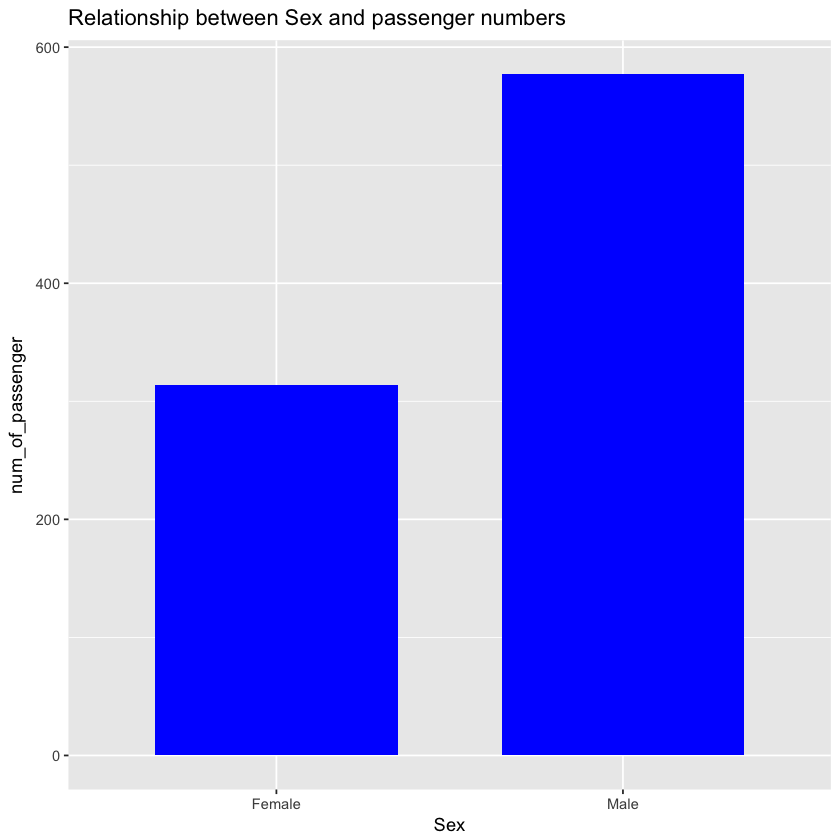

In [11]:
### Sex distribution
Sex_Distribution <- ggplot(data = Titanic_train, aes(x=Sex)) + geom_bar(fill='blue', width = 0.7) + ylab('num_of_passenger') + ggtitle('Relationship between Sex and passenger numbers')
Sex_Distribution

In [12]:
### 233 Female and 109 Males are survived; 81 Female and 468 Males are dead
sum(Titanic_train$Survived == 1 & Titanic_train$Sex == 'Female')
sum(Titanic_train$Survived == 1 & Titanic_train$Sex == 'Male')
sum(Titanic_train$Survived == 0 & Titanic_train$Sex == 'Female')
sum(Titanic_train$Survived == 0 & Titanic_train$Sex == 'Male')

[1] 233

[1] 109

[1] 81

[1] 468

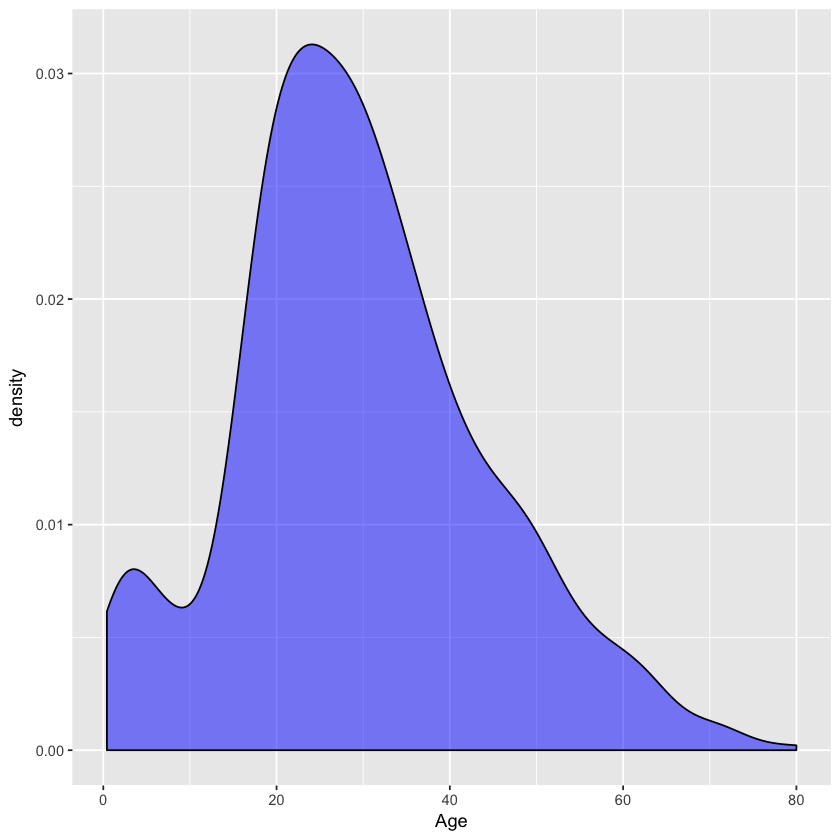

In [14]:
### Age distribution
Titanic_train1 <- Titanic_train %>%
  select(Survived, Pclass, Sex, Age) %>%
  filter(Age >= 0)
Age_Distribution <- ggplot() + geom_density(data = Titanic_train1, aes(x=Age), fill='blue', alpha=0.5)
Age_Distribution

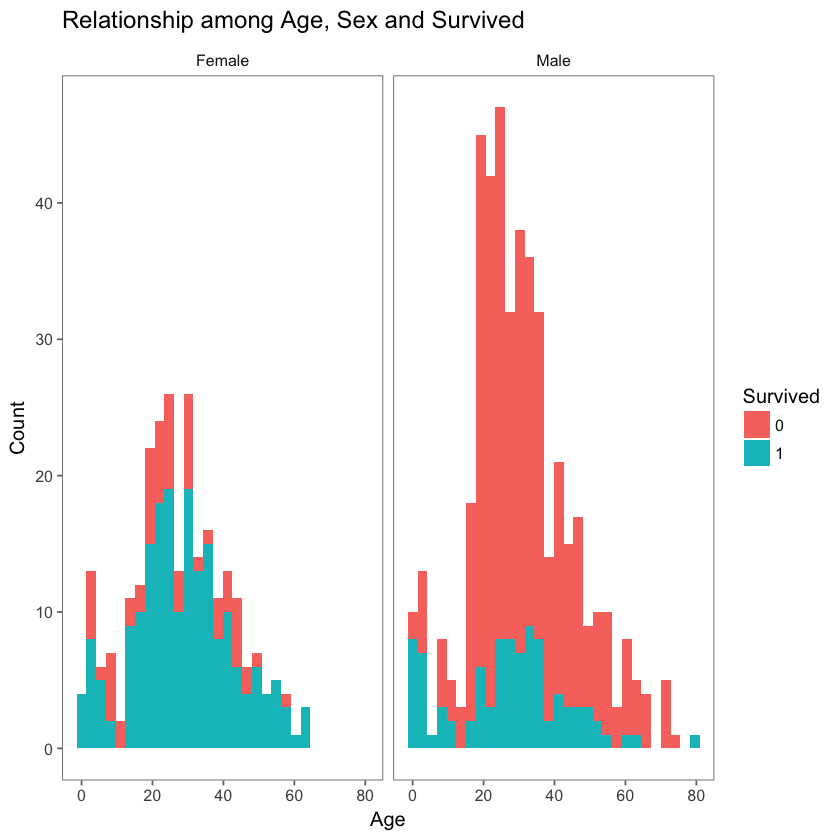

In [16]:
### Data Visualization for Age vs Sex vs Survived
Age_Sex_Survived <- ggplot(Titanic_train1, aes(Age, fill = factor(Survived))) + geom_histogram(bins=30) + theme_few() + xlab("Age") + ylab("Count") + facet_grid(.~Sex)+ scale_fill_discrete(name = "Survived") + theme_few()+ ggtitle("Relationship among Age, Sex and Survived")
Age_Sex_Survived

In [17]:
### 61.29% passengers younger than 10 years old survived, 36.65% passengers between 10 and 30 years old survived, 41.80% passengers between 30 and 50 years old survived, 36.49% over 50 years old survived.
max(Titanic_train$Age, na.rm = TRUE)
min(Titanic_train$Age, na.rm = TRUE)
sum(Titanic_train1$Age < 10 & Titanic_train1$Survived == 1) / sum(Titanic_train1$Age < 10)
sum(Titanic_train1$Age >= 10 & Titanic_train1$Age < 30 & Titanic_train1$Survived == 1) / sum(Titanic_train1$Age >= 10 & Titanic_train1$Age < 30)
sum(Titanic_train1$Age >= 30 & Titanic_train1$Age < 50 & Titanic_train1$Survived == 1) / sum(Titanic_train1$Age >= 30 & Titanic_train1$Age < 50)
sum(Titanic_train1$Age >= 50 & Titanic_train1$Survived == 1) / sum(Titanic_train1$Age >= 50)

[1] 80

[1] 0.42

[1] 0.6129032

[1] 0.3664596

[1] 0.4179688

[1] 0.3648649

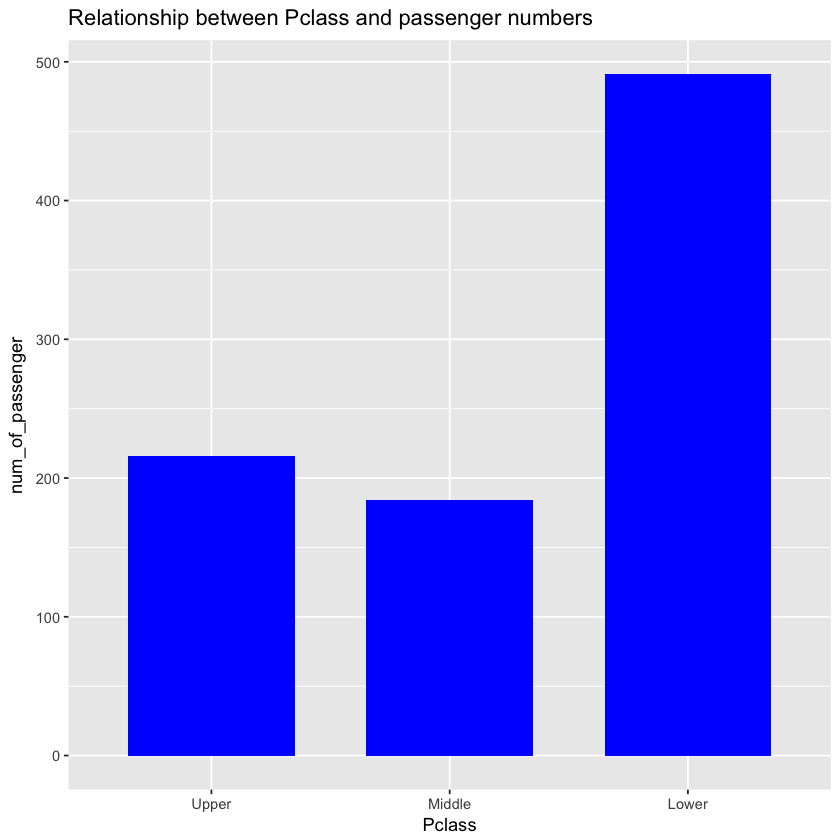

In [18]:
### Pclass distribution
Pclass_Distribution <- ggplot(data = Titanic_train, aes(x=Pclass)) + geom_bar(fill='blue', width = 0.7) + ylab('num_of_passenger') + ggtitle('Relationship between Pclass and passenger numbers')
Pclass_Distribution

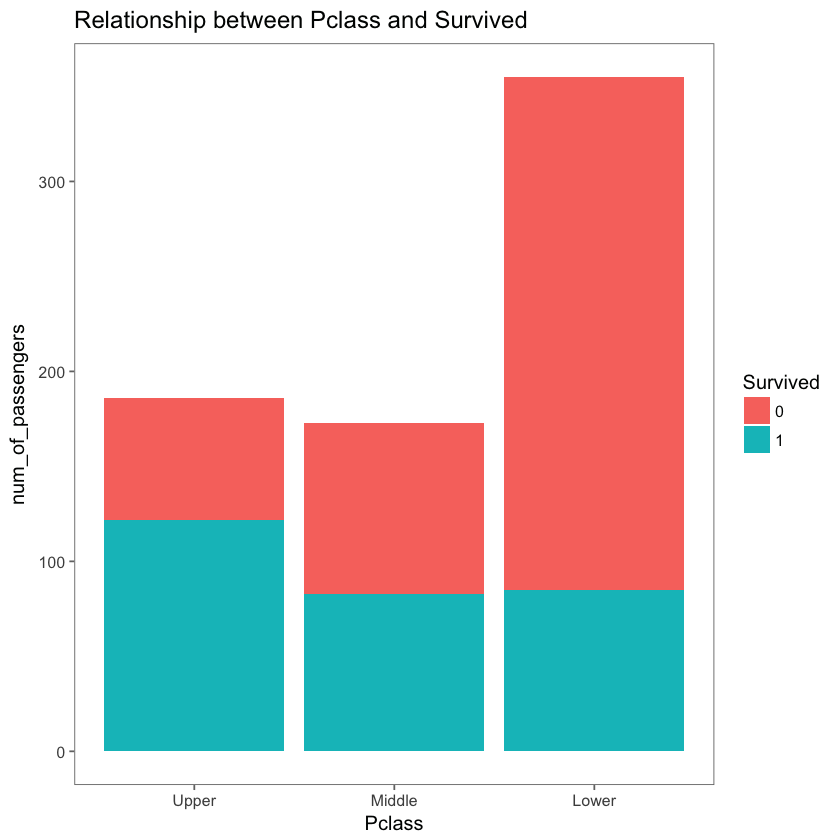

In [19]:
### Data Visualization for Pclass vs Survived
Pclass_Survived <- ggplot(Titanic_train1, aes(Pclass, fill = factor(Survived))) + geom_bar() + theme_few() + xlab("Pclass") + ylab("num_of_passengers") + scale_fill_discrete(name = "Survived") + theme_few()+ ggtitle("Relationship between Pclass and Survived")
Pclass_Survived

In [20]:
### 62.96% passengers with Upper class survived, 47.28% passengers with Middle class Survived, 24.24% passengers with Lower class Survived
sum(Titanic_train$Pclass == 'Upper' & Titanic_train$Survived == 1) / sum(Titanic_train$Pclass == 'Upper')
sum(Titanic_train$Pclass == 'Middle' & Titanic_train$Survived == 1) / sum(Titanic_train$Pclass == 'Middle')
sum(Titanic_train$Pclass == 'Lower' & Titanic_train$Survived == 1) / sum(Titanic_train$Pclass == 'Lower')

[1] 0.6296296

[1] 0.4728261

[1] 0.2423625

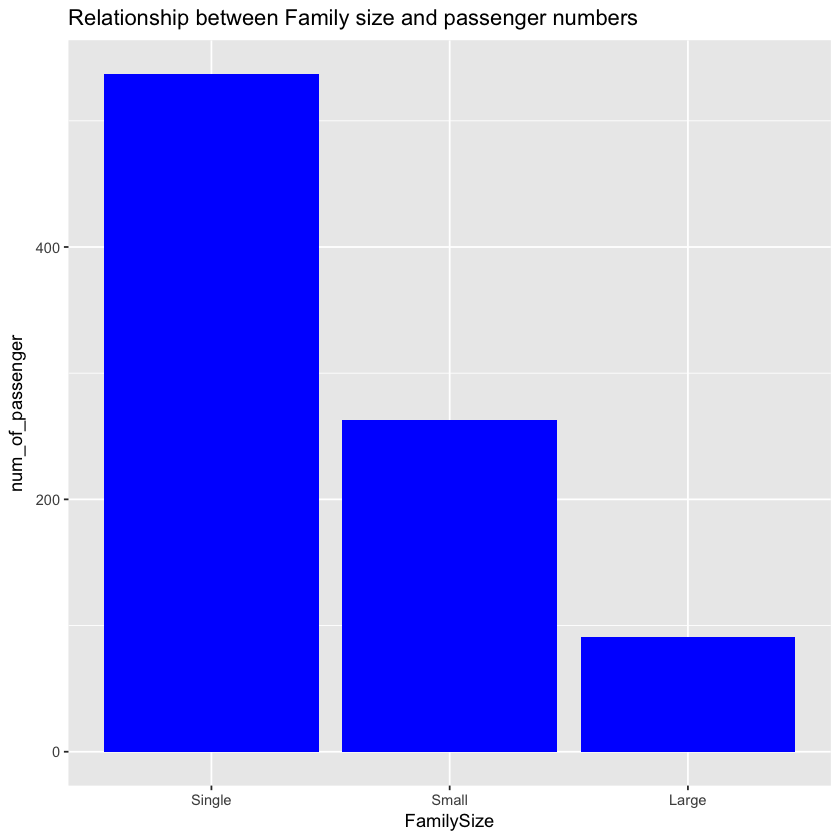

In [21]:
### Family Size distribution
Titanic_train$FamilySize <- ifelse(Titanic_train$SibSp + Titanic_train$Parch + 1 == 1, "Single", ifelse(Titanic_train$SibSp + Titanic_train$Parch + 1 < 4, "Small", "Large"))
FamilySize_Distribution <- ggplot(Titanic_train, aes(FamilySize)) + geom_bar(position="dodge", fill = 'blue') +  scale_x_discrete(limits=c("Single", "Small", "Large")) + ylab('num_of_passenger') + ggtitle('Relationship between Family size and passenger numbers')
FamilySize_Distribution

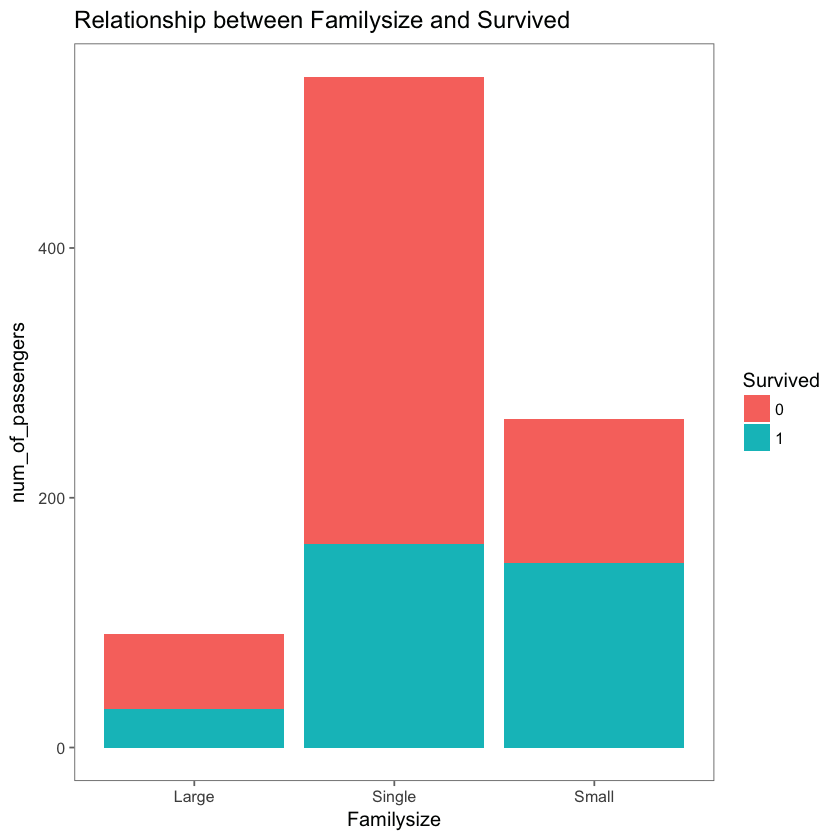

In [22]:
### Data Visualization for Familysize vs Survived
Familysize_Survived <- ggplot(Titanic_train, aes(FamilySize, fill = factor(Survived))) + geom_bar() + theme_few() + xlab("Familysize") + ylab("num_of_passengers") + scale_fill_discrete(name = "Survived") + theme_few()+ ggtitle("Relationship between Familysize and Survived")
Familysize_Survived

In [23]:
### 30.35% passengers with Single family size survived, 56.27% passengers with Small family size survived, 34.07% passengers with Large family size survived
sum(Titanic_train$FamilySize == 'Single' & Titanic_train$Survived == 1) / sum(Titanic_train$FamilySize == 'Single')
sum(Titanic_train$FamilySize == 'Small' & Titanic_train$Survived == 1) / sum(Titanic_train$FamilySize == 'Small')
sum(Titanic_train$FamilySize == 'Large' & Titanic_train$Survived == 1) / sum(Titanic_train$FamilySize == 'Large')

[1] 0.3035382

[1] 0.5627376

[1] 0.3406593

In [24]:
##### Linear Model: Survived = 1.014245 - -0.489949*SexMale - -0.006252*Age - 0.209941*PclassMiddle - 0.400391*PclassLower + 0.148970*FamilySizeSingle + 0.166486*FamilySizeSmall
Titanic_train_model <- Titanic_train %>%
  filter(Age >= 0) %>%
  select(Sex, Age, Pclass, FamilySize, Survived)
Titanic_model <- lm(Survived ~ Sex + Age + Pclass + FamilySize, data = Titanic_train_model)
summary(Titanic_model)


Call:
lm(formula = Survived ~ Sex + Age + Pclass + FamilySize, data = Titanic_train_model)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.00174 -0.23825 -0.07281  0.22178  1.00846 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       1.014245   0.060983  16.632  < 2e-16 ***
SexMale          -0.489949   0.031422 -15.593  < 2e-16 ***
Age              -0.006252   0.001127  -5.550 4.05e-08 ***
PclassMiddle     -0.209941   0.041666  -5.039 5.96e-07 ***
PclassLower      -0.400391   0.038976 -10.273  < 2e-16 ***
FamilySizeSingle  0.148970   0.050591   2.945  0.00334 ** 
FamilySizeSmall   0.166486   0.051740   3.218  0.00135 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3825 on 707 degrees of freedom
Multiple R-squared:  0.3994,	Adjusted R-squared:  0.3943 
F-statistic: 78.34 on 6 and 707 DF,  p-value: < 2.2e-16
